# <center> [Adult salaries](https://archive.ics.uci.edu/ml/datasets/adult): EDA
### <center>Predict whether income exceeds $50K/yr based on census data.

In [1]:
# ONLY IN COLAB !!!

# DOWNLOAD MURC.IA
#!wget -P ./../ "https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/murcIA.py"

# DOWNLOAD DATASET:
#!wget -P ./datum/ "https://raw.githubusercontent.com/SaturdaysAI-Murcia/machine-learning/master/2.%20Tabular%20data%20(clas)/data/titanic_train.csv"

In [2]:
%run ../murcIA.py

                           _____           
                          |_   _|   /\     
  _ __ ___  _   _ _ __ ___  | |    /  \    
 | '_ ` _ \| | | | '__/ __| | |   / /\ \   
 | | | | | | |_| | | | (__ _| |_ / ____ \  
 |_| |_| |_|\__ _|_|  \___|_____/_/    \_\ 
                                           
🕑 Hora:   13:10
🗓️ Fecha:  20/02/2020
💻 S.O.:   Darwin
🔥 CPU:    8 cores
🔥 GPU:    No
🐍 Python: 3.7.3

PAQUETES:

  Numpy (np):            1.18.0
  Pandas (pd):           1.0.1
  Pandas Profiling (pp): 2.3.0
  Missingno (ms):        0.4.2
  Seaborn (sb):          0.10.0
  Altair (at):           4.0.0
  Matplotlib (plt):      3.0.3
  UMAP (umap):           0.3.10
  Sklearn (skl):         0.22.1
  XGBoost (xgb):         0.90
  LightGBM (lgb):        2.3.1
  Pytorch:               1.3.1
  Fast.ai:               1.0.60

FUNCIONES DISPONIBLES:

  df = reduce_mem_usage(df)
  plot_num(pandas_series)
  plot_num2(pandas_series)
  plot_ord(pandas_series)
  plot_cat(pandas_series)


# Leer CSV

In [3]:
df = pd.read_csv("data/titanic_train.csv", index_col="PassengerId")
df["Survived"] = df["Survived"].map({0: "Died", 1: "Survived"})
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,Died,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [5]:
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
Survived,891,2,Died,549
Name,891,891,"Kelly, Miss. Anna Katherine ""Annie Kate""",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,204,147,C23 C25 C27,4
Embarked,889,3,S,644


# <center> Univariate analysis

# Variables numéricas (números con decinales)

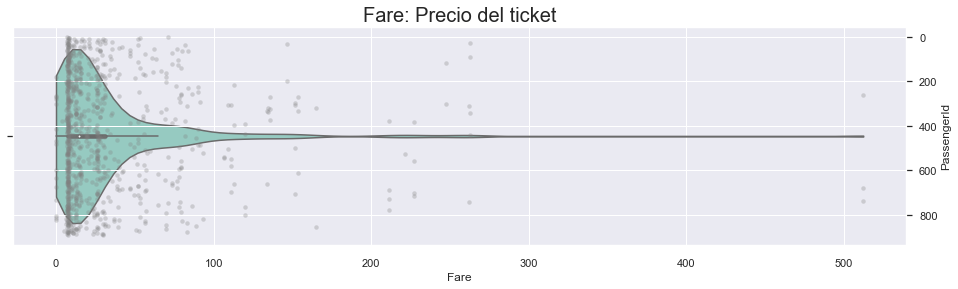

In [6]:
plot_num(df["Fare"], "Fare: Precio del ticket")

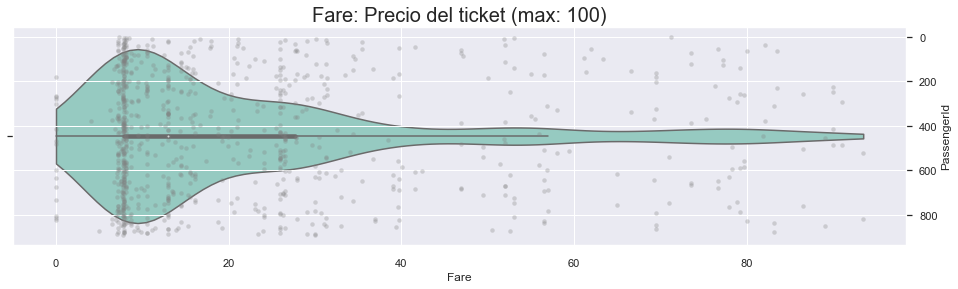

In [7]:
plot_num(df["Fare"], "Fare: Precio del ticket", max=100)

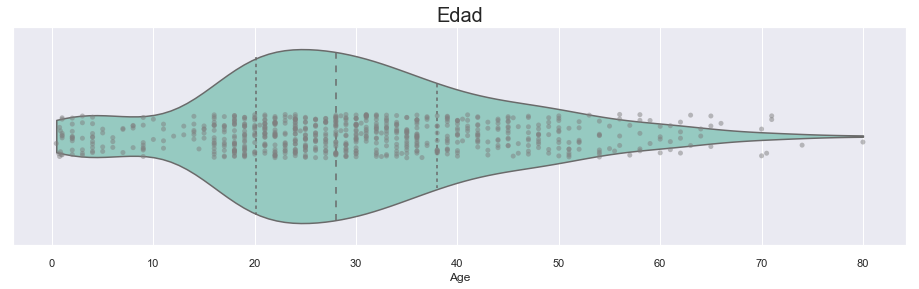

In [8]:
plot_num2(df.Age, "Edad")

# Variables ordinales (números enteros)

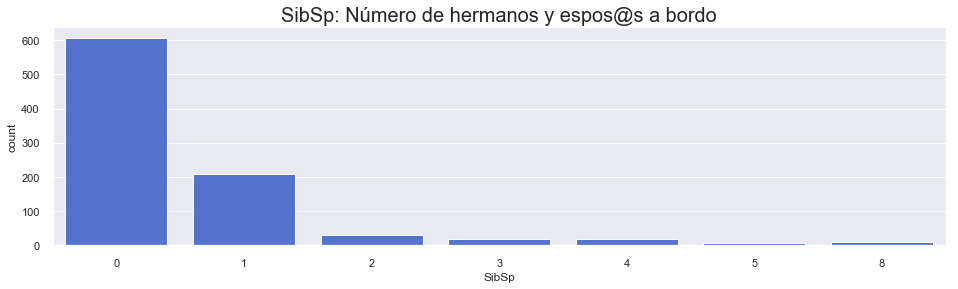

In [12]:
plot_ord(df["SibSp"], "SibSp: Número de hermanos y espos@s a bordo")

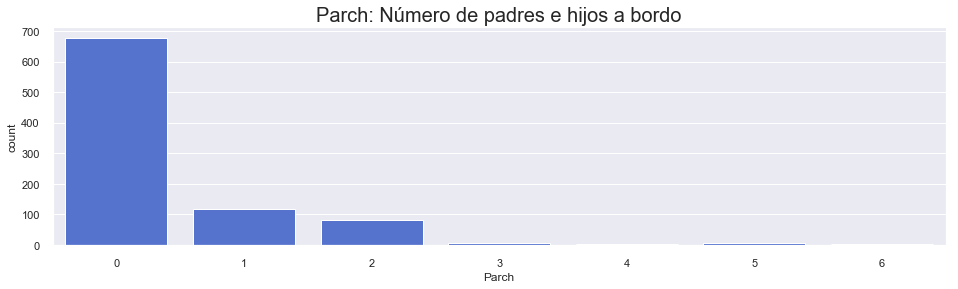

In [13]:
plot_ord(df["Parch"], "Parch: Número de padres e hijos a bordo")

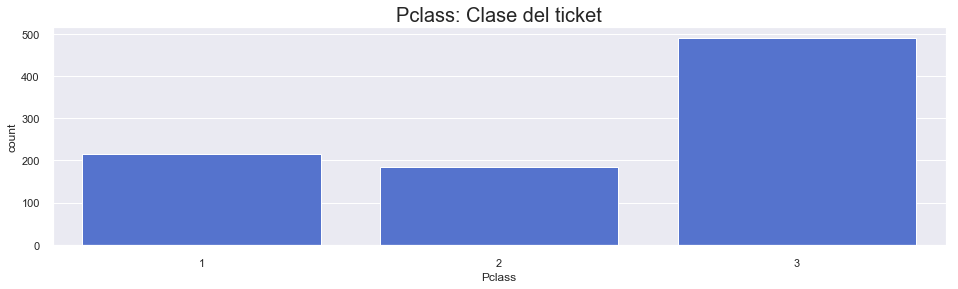

In [14]:
plot_ord(df["Pclass"], "Pclass: Clase del ticket")

# Variables nominales (categorías)

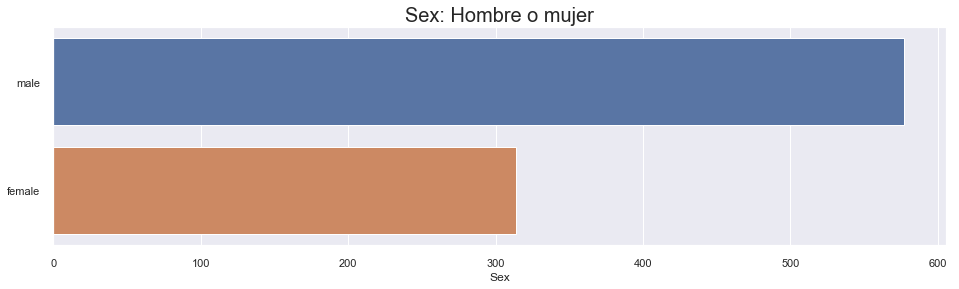

In [15]:
plot_cat(df["Sex"], "Sex: Hombre o mujer")

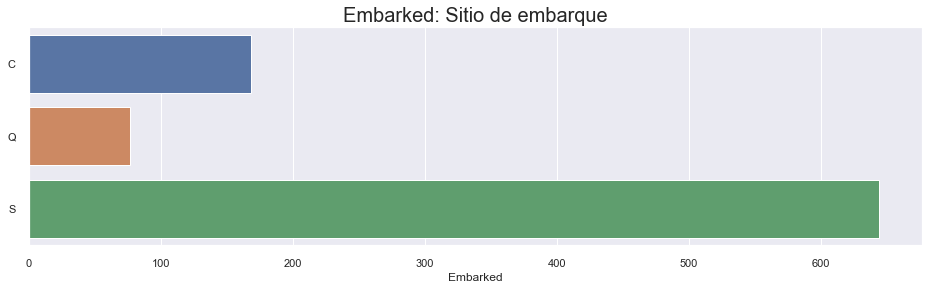

In [16]:
plot_cat(df["Embarked"], "Embarked: Sitio de embarque")

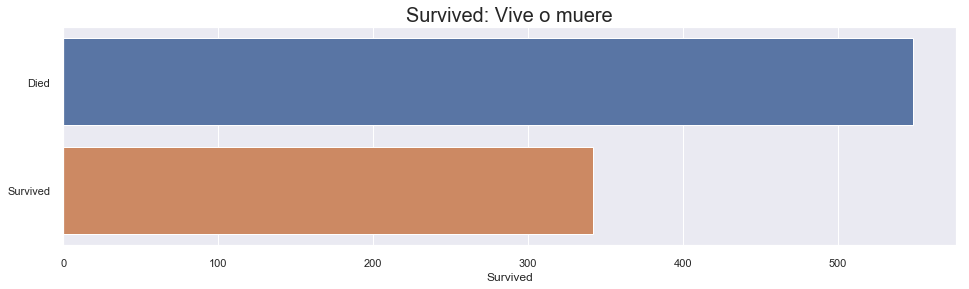

In [17]:
plot_cat(df["Survived"], "Survived: Vive o muere")

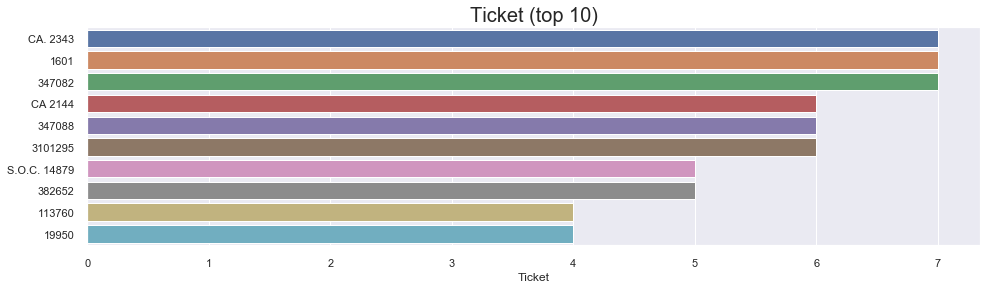

In [18]:
plot_cat(df["Ticket"], "Ticket", top=10)

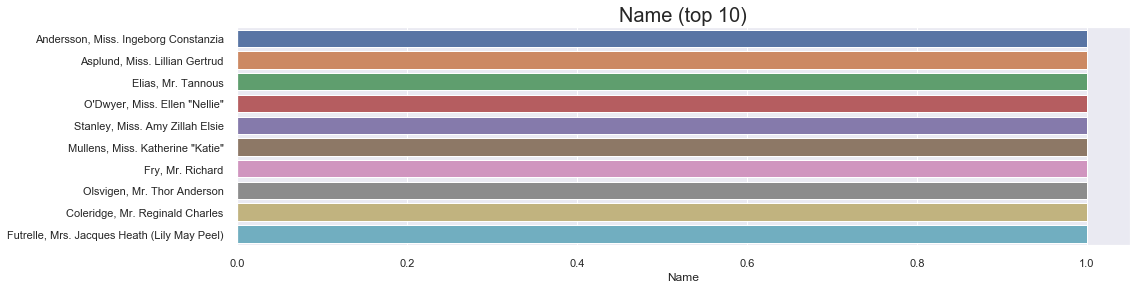

In [19]:
plot_cat(df["Name"], "Name", top=10)

# <center> Bivariate analysis

## Correlation matrix

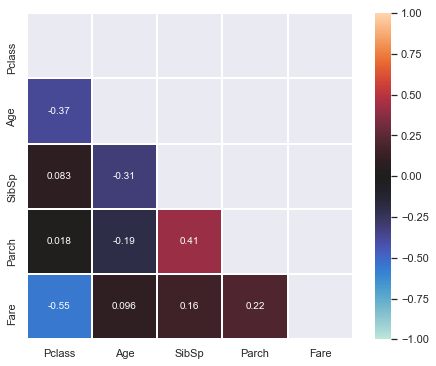

In [18]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, mask=mask, center=0, vmin=-1, vmax=1, linewidths=1, square=True);

# [Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) (Scatter matrix)

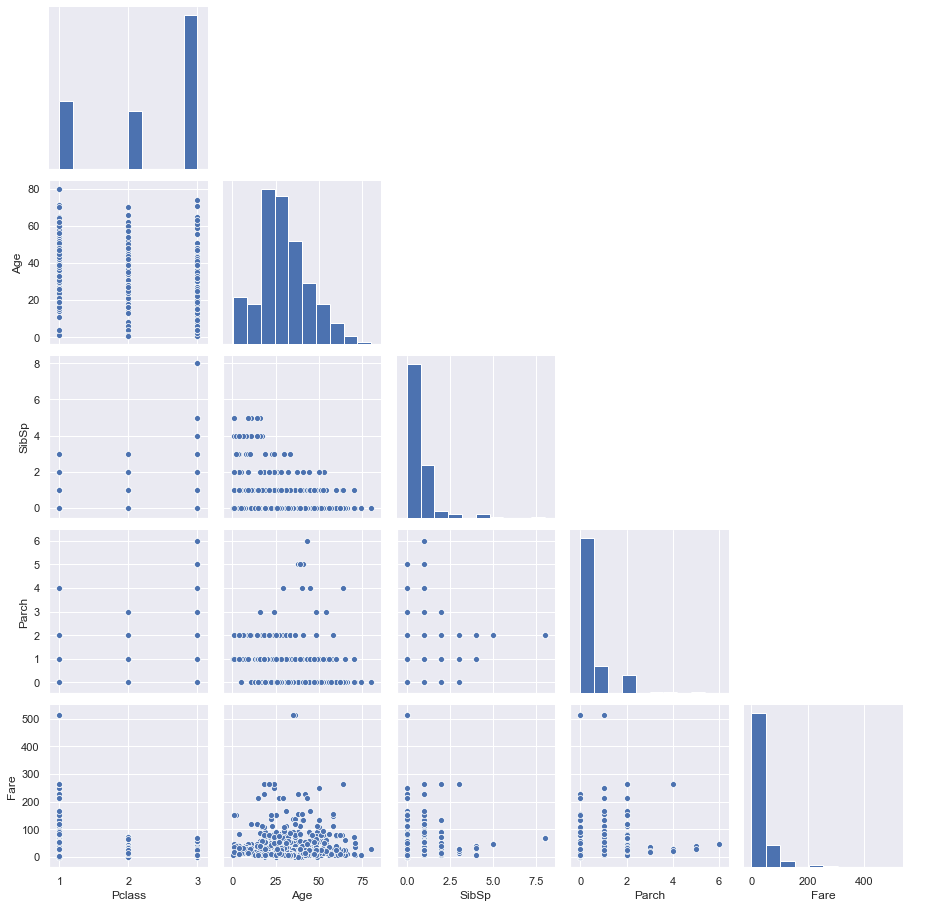

In [19]:
sns.pairplot(df, corner=True);

# [Seaborn PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) (Scatter matrix)

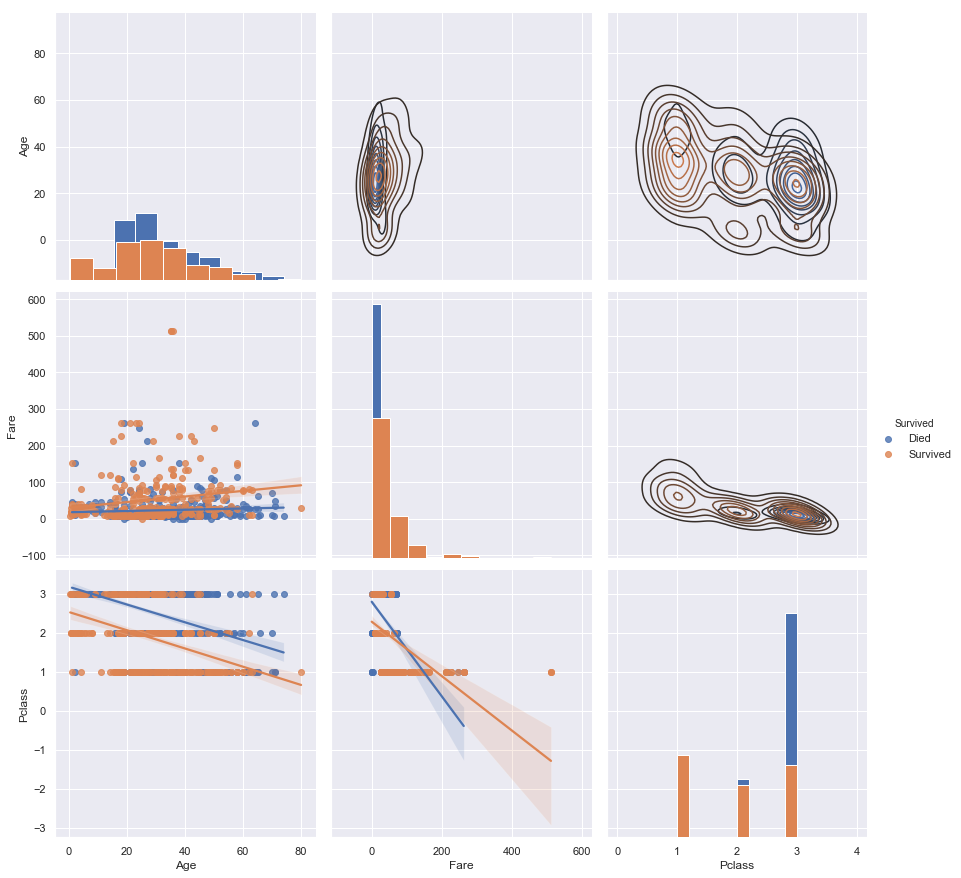

In [20]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=df, vars=['Age', 'Fare', "Pclass"], hue="Survived", height=4)

grid = grid.map_upper(sns.kdeplot) # UPPER TRIANGLE: sns.regplot || sns.kdeplot || sns.hexbin || sns.heatmap
grid = grid.map_diag(plt.hist)     # DIAGONAL:       plt.hist    || sns.kdeplot, lw=2
grid = grid.map_lower(sns.regplot) # LOWER TRIANGLE: sns.regplot || sns.kdeplot
grid = grid.add_legend()
grid;

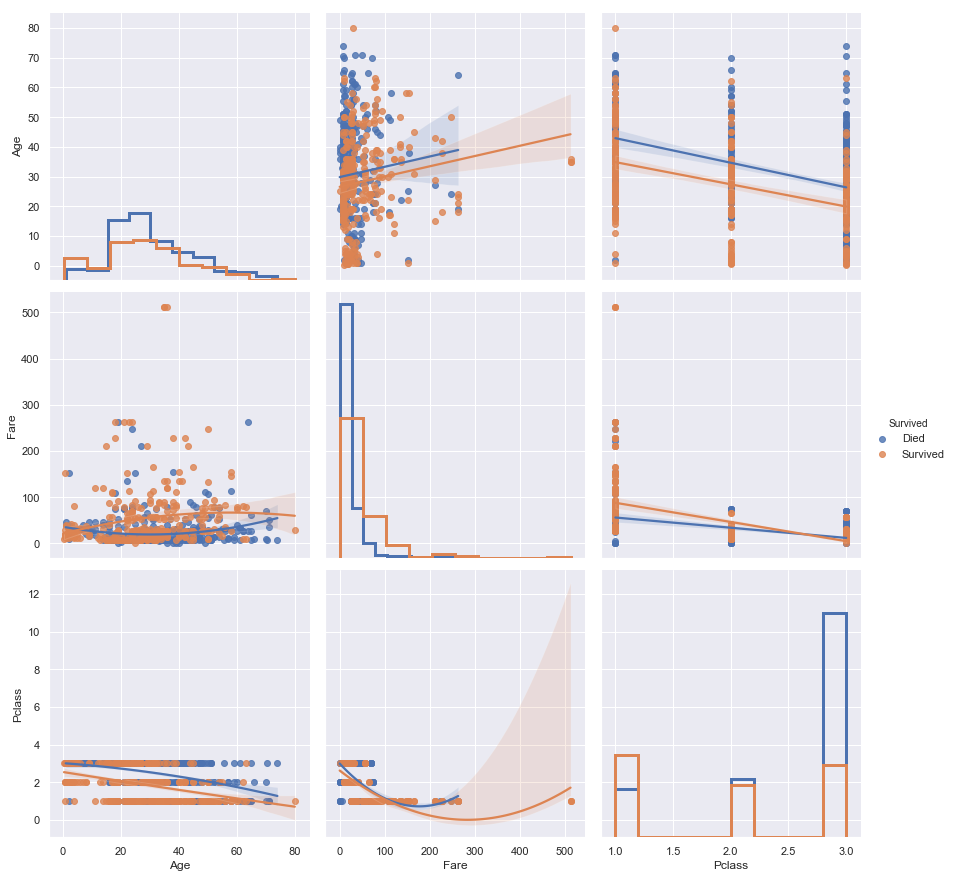

In [21]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=df, vars=['Age', 'Fare', "Pclass"], hue="Survived", height=4)

grid = grid.map_upper(sns.regplot)
grid = grid.map_diag(plt.hist, histtype="step", linewidth=3)
grid = grid.map_lower(sns.regplot, order=2)
grid = grid.add_legend()
grid;

# Missings

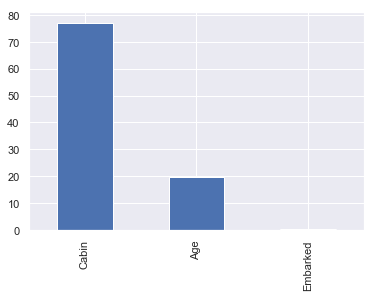

In [22]:
def plot_missings(df):
    missing = df.isnull().sum()
    missing = missing/df.isnull().count()*100
    missing = missing[missing > 0]
    missing.sort_values(ascending=False, inplace=True)
    missing.plot.bar()
    
plot_missings(df)

In [23]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')
mode_imputer = SimpleImputer(strategy='most_frequent')

df["Age"]      = mean_imputer.fit_transform(df[["Age"]]).ravel()
df["Embarked"] = mode_imputer.fit_transform(df[["Embarked"]]).ravel()
df.drop(columns=['Cabin'], inplace=True)

In [24]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,Died,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,Survived,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
3,Survived,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
4,Survived,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
5,Died,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,Died,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
888,Survived,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
889,Died,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S


## Tipos de variables

In [25]:
cat  = df.select_dtypes(include=[object]).columns
num  = df.select_dtypes(exclude=[object, 'datetime64','timedelta64']).columns
time = df.select_dtypes(include=['datetime64']).columns

print("\nNumerical features:\n", num.values)
print("\nCategorical features:\n", cat.values)
print("\nDate/time features:\n", time.values)


Numerical features:
 ['Pclass' 'Age' 'SibSp' 'Parch' 'Fare']

Categorical features:
 ['Survived' 'Name' 'Sex' 'Ticket' 'Embarked']

Date/time features:
 []


# Encode categorical

In [26]:
from sklearn.preprocessing   import LabelEncoder

df[cat] = df[cat].apply(LabelEncoder().fit_transform)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,108,1,22.0,1,0,523,7.2500,2
2,1,1,190,0,38.0,1,0,596,71.2833,0
3,1,3,353,0,26.0,0,0,669,7.9250,2
4,1,1,272,0,35.0,1,0,49,53.1000,2
5,0,3,15,1,35.0,0,0,472,8.0500,2


In [27]:
len(df)

891

# Reducción de la dimensionalidad

In [28]:
tsne_feats = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

In [29]:
from sklearn.manifold import TSNE

model = TSNE(n_components=2, random_state=0, perplexity=40, n_jobs=-1)
X = df[tsne_feats].fillna(0.).values
tsne = model.fit_transform(X)

df['tsne1']   = tsne[:,0]
df['tsne2']   = tsne[:,1]

In [30]:
import altair as alt

alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Survived:N',
    tooltip=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
).properties(
    width=400,
    height=400
)

alt.Chart(...)

In [31]:
alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Fare:Q',
).properties(width=400, height=400)

alt.Chart(...)

In [32]:
alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Pclass:N',
).properties(
    width=400,
    height=400
)

alt.Chart(...)

In [33]:
alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Sex:N',
).properties(width=400, height=400)

alt.Chart(...)

In [34]:
alt.Chart(df).mark_circle().encode(
    x='tsne1:Q', 
    y='tsne2:Q',
    color='Embarked:N',
).properties(width=400, height=400)

alt.Chart(...)

# <center> FIN